In [31]:
import imodels
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from imodels.tree.rf_plus.rf_plus.rf_plus_models import RandomForestPlusRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, mean_squared_error, r2_score
from imodels.tree.rf_plus.feature_importance.rfplus_explainer import *
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt
import openml


In [32]:
X, y, _ = imodels.get_clean_dataset("diabetes_regr")
# X = np.delete(X, 4,1)
# dataset = openml.datasets.get_dataset(588)
# X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format="array")

fetching diabetes from sklearn


In [33]:
# np.random.seed(42) 
# data = np.random.randn(1000, 10)
# n_groups = 2
# group_indicator = np.random.choice(n_groups, size=1000)
# y = np.zeros(1000)
# coefficients = np.random.randn(n_groups, data.shape[1])
# for group in range(n_groups):
#     group_mask = group_indicator == group
#     selected_features = data[group_mask]
#     y[group_mask] = np.dot(selected_features, coefficients[group])
# X = np.column_stack((data, group_indicator))

In [34]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
pd.DataFrame(X).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
1,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
2,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
3,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
4,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
5,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
8,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
9,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


(array([ 2.,  1.,  8., 10., 17., 14., 17., 18., 11., 20., 18., 18.,  9.,
        13., 10.,  9., 15., 11., 15., 12.,  6.,  9., 10., 13., 12.,  7.,
         9., 12.,  5.,  8.,  8.,  5.,  8.,  8.,  9.,  4., 11.,  8., 10.,
         9.,  3.,  3.,  3.,  3.,  5.,  1.,  1.,  1.,  1.,  2.]),
 array([ 25.  ,  31.42,  37.84,  44.26,  50.68,  57.1 ,  63.52,  69.94,
         76.36,  82.78,  89.2 ,  95.62, 102.04, 108.46, 114.88, 121.3 ,
        127.72, 134.14, 140.56, 146.98, 153.4 , 159.82, 166.24, 172.66,
        179.08, 185.5 , 191.92, 198.34, 204.76, 211.18, 217.6 , 224.02,
        230.44, 236.86, 243.28, 249.7 , 256.12, 262.54, 268.96, 275.38,
        281.8 , 288.22, 294.64, 301.06, 307.48, 313.9 , 320.32, 326.74,
        333.16, 339.58, 346.  ]),
 <BarContainer object of 50 artists>)

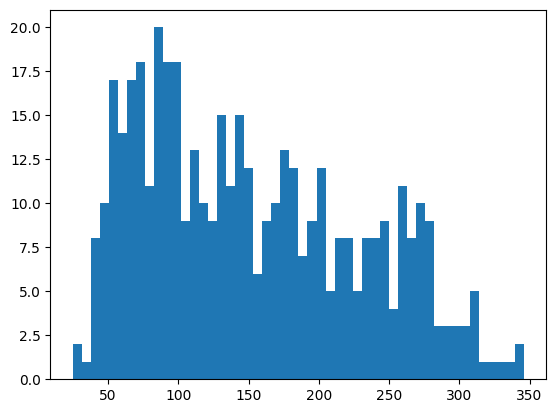

In [36]:
# Plot y
plt.hist(y, bins=50)

In [37]:
# apply the log transformation to y
# y = np.log(y)
# plt.hist(y, bins=50)

In [38]:
# X, y, _ = imodels.get_clean_dataset("diabetes_regr")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape)
# standardize the data using sklearn's StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

(296, 10) (146, 10)


In [39]:
from sklearn.kernel_ridge import KernelRidge
est = KernelRidge()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

27233.158339294056
-4.437746325057651


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, None]
}
grid_search = GridSearchCV(KernelRidge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_est = grid_search.best_estimator_
y_pred = best_est.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/accounts/projects/binyu/zhongyuan_liang/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:243:

2892.2187159889345
0.42249989890304185


In [41]:
grid_search.best_params_

{'alpha': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [5]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf= 3, max_features= 'sqrt', random_state= 42)
rf.fit(X_train, y_train)
rf_plus_base = RandomForestPlusClassifier(rf_model=rf)
rf_plus_base.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished


In [6]:
rf_plus_mdi = AloRFPlusMDI(rf_plus_base, evaluate_on="all")
partial_preds_subtract_intercept = rf_plus_mdi.explain_subtract_intercept(X=X_test)

AttributeError: 'AloMDIPlusPartialPredictionModelClassifier' object has no attribute 'predict_partial_k_subtract_intercept'

In [ ]:
partial_preds_subtract_intercept[0]

In [ ]:
partial_preds_subtract_intercept[0]

In [ ]:
rf_plus_base.predict_proba(X_test)

In [ ]:
temp = rf_plus_mdi.explain(X=X_test, y=y_test)

In [ ]:
temp[0][0]

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=41, min_samples_leaf=5, max_features=0.33)
rf.fit(X_train, y_train)
rf_plus_base = RandomForestPlusRegressor(rf_model=copy.deepcopy(rf))
rf_plus_base.fit(X_train, y_train)
test_all_mse_rf = mean_squared_error(y_test, rf.predict(X_test))
test_all_r2_rf = r2_score(y_test, rf.predict(X_test))
test_all_mse_rf_plus = mean_squared_error(y_test, rf_plus_base.predict(X_test))
test_all_r2_rf_plus = r2_score(y_test, rf_plus_base.predict(X_test))
print("Test MSE RF: ", test_all_mse_rf)
print("Test R2 RF: ", test_all_r2_rf)
print("Test MSE RF+: ", test_all_mse_rf_plus)
print("Test R2 RF+: ", test_all_r2_rf_plus)

In [ ]:
# Get shap values
import shap
explainer = shap.TreeExplainer(rf)
shap_values_train = explainer.shap_values(X_train, check_additivity=True)
# shap_values_train = np.abs(shap_values_train)
shap_values_test = explainer.shap_values(X_test, check_additivity=True)
# shap_values_test = np.abs(shap_values_test)

In [ ]:
def ablation_removal(train_mean, data, feature_importance_rank, feature_index):
    data_copy = data.copy()
    indices = feature_importance_rank[:, feature_index]
    data_copy[np.arange(data.shape[0]), indices] = train_mean[indices]
    return data_copy
def ablation_removal_positive(train_mean, data, feature_importance_rank, feature_importance, feature_index):
    data_copy = data.copy()
    indices = feature_importance_rank[:, feature_index]
    sum = 0
    for i in range(data.shape[0]):
        if feature_importance[i, indices[i]] > 0:
            sum += 1
            data_copy[i, indices[i]] = train_mean[indices[i]]
    print("Remove sum: ", sum)
    return data_copy
def ablation_removal_negative(train_mean, data, feature_importance_rank, feature_importance, feature_index):
    data_copy = data.copy()
    indices = feature_importance_rank[:, feature_index]
    sum = 0
    for i in range(data.shape[0]):
        if feature_importance[i, indices[i]] < 0:
            sum += 1
            data_copy[i, indices[i]] = train_mean[indices[i]]
    print("Remove sum: ", sum)
    return data_copy

In [ ]:
ablation_models = {"RF_Regressor": rf,
                    "Linear": LinearRegression(),
                    "RF_Plus_Regressor": rf_plus_base}
X_data = X_test
y_data = y_test
ablation_data="test"
ablation_models["Linear"].fit(X_train, y_train)

### Shap

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    print(f"enter i: {i}")
    ablation_X_data = ablation_removal_negative(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(-1*shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data_rank = np.argsort(-1*np.abs(shap_values_test))#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal(train_mean, X_temp, local_fi_score_data_rank, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    print(f"enter i: {i}")
    ablation_X_data = ablation_removal_negative(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(-1*shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data_rank = np.argsort(-1*np.abs(shap_values_test))#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal(train_mean, X_temp, local_fi_score_data_rank, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Plus_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    print(f"enter i: {i}")
    ablation_X_data = ablation_removal_negative(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Plus_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data =shap_values_test
local_fi_score_data_rank = np.argsort(-1*shap_values_test)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "RF_Plus_Regressor"
ablation_est = ablation_models[a_model]
metric_results = {}
local_fi_score_data_rank = np.argsort(-1*np.abs(shap_values_test))#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal(train_mean, X_temp, local_fi_score_data_rank, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

### Check whether sum to hat_y

In [ ]:
assert np.all(rf.predict(X_test)) == np.all(np.sum(shap_values_test, axis=1) + explainer.expected_value)

In [ ]:
explainer.expected_value

In [ ]:
# get localMDI+
rf_plus_mdi = AloRFPlusMDI(rf_plus_base, evaluate_on="all")
local_feature_importances_train, a = rf_plus_mdi.explain(X=X_train, y=y_train)
local_feature_importances_train[0]

In [ ]:
from sklearn.linear_model import Ridge
rf_plus_base = RandomForestPlusRegressor(rf_model=copy.deepcopy(rf), include_raw=False, fit_on="inbag", prediction_model=Ridge(alpha=1e-6))
rf_plus_base.fit(X_train, y_train)
rf_plus_mdi = RFPlusMDI(rf_plus_base, evaluate_on="inbag")
local_feature_importances_train, _ = rf_plus_mdi.explain(X=X_train, y=y_train)
local_feature_importances_train[0]

### LMDI+

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
X_data = X_train
y_data = y_train
ablation_data="test"
metric_results = {}
local_fi_score_data =local_feature_importances_train
local_fi_score_data_rank = np.argsort(local_feature_importances_train)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_negative(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
X_data = X_train
y_data = y_train
ablation_data="test"
metric_results = {}
local_fi_score_data =local_feature_importances_train
local_fi_score_data_rank = np.argsort(-1*local_feature_importances_train)
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, local_fi_score_data_rank, local_fi_score_data, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
a_model = "Linear"
ablation_est = ablation_models[a_model]
X_data = X_train
y_data = y_train
ablation_data="test"
metric_results = {}
local_fi_score_data_rank = np.argsort(-1*np.abs(local_feature_importances_train))#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))
num_ablate_features = X_train.shape[1]
train_mean = np.mean(X_train, axis=0)

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal(train_mean, X_temp, local_fi_score_data_rank, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

mse_before = metric_results[a_model + f'_{ablation_data}_MSE_before_ablation']
r2_before = metric_results[a_model + f'_{ablation_data}_R_2_before_ablation']

mse_after = [metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i}'] for i in range(1, num_ablate_features)]
r2_after = [metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i}'] for i in range(1, num_ablate_features)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

#### Analysis 1

In [ ]:
pd.DataFrame(X_train).corr()

In [ ]:
local_fi_score_data = np.argsort(-1*local_feature_importances_train)#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
imp_vals = copy.deepcopy(local_fi_score_data)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, imp_vals, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
    differences = X_temp != X_train
    differences_per_col = np.sum(differences, axis=0)
    print(differences_per_col)
    lm = LinearRegression()
    lm.fit(X_temp, y_train)
    print(r2_score(y_train, lm.predict(X_temp)))
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

In [ ]:
local_fi_score_data = np.argsort(-1*np.random.rand(X_train.shape[0], 10))#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
imp_vals = copy.deepcopy(local_fi_score_data)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, imp_vals, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
    differences = X_temp != X_train
    differences_per_col = np.sum(differences, axis=0)
    print(differences_per_col)
    lm = LinearRegression()
    lm.fit(X_temp, y_train)
    print(r2_score(y_train, lm.predict(X_temp)))
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

In [ ]:
mse_before = metric_results['Linear_train_MSE_before_ablation']
r2_before = metric_results['Linear_train_R_2_before_ablation']

mse_after = [metric_results[f'Linear_train_MSE_after_ablation_{i}'] for i in range(1, 10)]
r2_after = [metric_results[f'Linear_train_R_2_after_ablation_{i}'] for i in range(1, 10)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, 10)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, 10)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
local_fi_score_data = np.argsort(-1*shap_values_train)#np.argsort(-1*local_feature_importances_train) #np.argsort(-1*shap_values_train) #np.argsort(-1*np.random.rand(X_train.shape[0], 10))

y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
imp_vals = copy.deepcopy(local_fi_score_data)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, imp_vals, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
    differences = X_temp != X_train
    differences_per_col = np.sum(differences, axis=0)
    print(differences_per_col)
    lm = LinearRegression()
    lm.fit(X_temp, y_train)
    print(r2_score(y_train, lm.predict(X_temp)))
for i in range(num_ablate_features):
    metric_results[f'{a_model}_{ablation_data}_MSE_after_ablation_{i+1}'] = ablation_results_list[i]
    metric_results[f'{a_model}_{ablation_data}_R_2_after_ablation_{i+1}'] = ablation_results_list_r2[i]

In [ ]:
mse_before = metric_results['Linear_train_MSE_before_ablation']
r2_before = metric_results['Linear_train_R_2_before_ablation']

mse_after = [metric_results[f'Linear_train_MSE_after_ablation_{i}'] for i in range(1, 10)]
r2_after = [metric_results[f'Linear_train_R_2_after_ablation_{i}'] for i in range(1, 10)]

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, 10)], [mse_before] + mse_after, color='tab:red', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('MSE')
plt.title(f'{a_model} MSE Before and After Ablation')
plt.show()

# Plotting R^2
plt.figure(figsize=(12, 6))
plt.plot(['Before'] + [f'After {i}' for i in range(1, num_ablate_features)], [r2_before] + r2_after, color='tab:blue', marker='o')
plt.xlabel('Ablation Step')
plt.ylabel('R^2')
plt.title(f'{a_model} R^2 Before and After Ablation')
plt.show()

In [ ]:
y_pred = ablation_est.predict(X_data)
metric_results[a_model + f'_{ablation_data}_MSE_before_ablation'] = mean_squared_error(y_data, y_pred)
metric_results[a_model + f'_{ablation_data}_R_2_before_ablation'] = r2_score(y_data, y_pred)
imp_vals = copy.deepcopy(local_fi_score_data)
ablation_results_list = [0] * num_ablate_features
ablation_results_list_r2 = [0] * num_ablate_features
X_temp = X_data.copy()
var = []
for i in range(num_ablate_features):
    ablation_X_data = ablation_removal_positive(train_mean, X_temp, imp_vals, i)
    ablation_results_list[i] = mean_squared_error(y_data, ablation_est.predict(ablation_X_data))
    ablation_results_list_r2[i] = r2_score(y_data, ablation_est.predict(ablation_X_data))
    X_temp = ablation_X_data
    differences = X_temp != X_train
    differences_per_col = np.sum(differences, axis=0)
    # print(differences_per_col)
    # print(np.array(differences_per_col).var())
    var.append(np.array(differences_per_col).var())

In [ ]:
ablation_results_list

In [ ]:
ablation_results_list_r2

In [ ]:
differences = X_temp != X_train
differences_per_row = np.sum(differences, axis=1)
print(differences_per_row)

In [ ]:
X_train.shape

In [ ]:
differences = X_temp != X_train
differences_per_col = np.sum(differences, axis=0)
print(differences_per_col)
print(np.array(differences_per_col).var())

In [ ]:
train_mean

In [ ]:
ablation_est.coef_

In [ ]:
ablation_est.intercept_

In [ ]:
y_train.mean()

In [ ]:
((y_train - y_train.mean())**2).sum()

In [ ]:
((y_train - ablation_est.predict(X_train))**2).sum()

In [ ]:
((y_train - ablation_est.predict(X_temp))**2).sum()

### Analysis 2

In [ ]:
lm = LinearRegression()
lm.fit(X_temp, y_train)
r2_score(y_train, lm.predict(X_temp))

In [ ]:
lm.coef_

In [ ]:
ablation_est.coef_

In [ ]:
lm.coef_-ablation_est.coef_